# Explorando os DADOS

In [1]:
! pip install statsmodel
! pip install python-binance
! pip install yfinance

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 5.0 MB/s eta 0:00:00


In [11]:
# Importando as libs que eu vou usar para a análise dos dados
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
# Buscando dados do Bitcoin usando yfinance
btc = yf.Ticker('BTC-USD')
btc_data = btc.history(period='1y')

# Exibindo as primeiras linhas dos dados
btc_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-17 00:00:00+00:00,26567.927734,26617.998047,26445.074219,26534.187500,6774210670,0.0,0.0
2023-09-18 00:00:00+00:00,26532.994141,27414.734375,26415.515625,26754.281250,15615339655,0.0,0.0
2023-09-19 00:00:00+00:00,26760.851562,27488.763672,26681.605469,27211.117188,13807690550,0.0,0.0
2023-09-20 00:00:00+00:00,27210.228516,27379.505859,26864.082031,27132.007812,13281116604,0.0,0.0
2023-09-21 00:00:00+00:00,27129.839844,27152.939453,26389.300781,26567.632812,13371443708,0.0,0.0


In [13]:
print('Tipo dos dados:', type(btc_data))
print('Dimensões dos dados:', btc_data.shape)
print('Colunas dos dados:', btc_data.columns)
print('Informações dos dados:', btc_data.info())

Tipo dos dados: <class 'pandas.core.frame.DataFrame'>
Dimensões dos dados: (367, 7)
Colunas dos dados: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2023-09-17 00:00:00+00:00 to 2024-09-17 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          367 non-null    float64
 1   High          367 non-null    float64
 2   Low           367 non-null    float64
 3   Close         367 non-null    float64
 4   Volume        367 non-null    int64  
 5   Dividends     367 non-null    float64
 6   Stock Splits  367 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.9 KB
Informações dos dados: None


In [14]:
print('Tipo do índice:', type(btc_data.index))

Tipo do índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [15]:
print('Valores do índice:', btc_data.index)

Valores do índice: DatetimeIndex(['2023-09-17 00:00:00+00:00', '2023-09-18 00:00:00+00:00',
               '2023-09-19 00:00:00+00:00', '2023-09-20 00:00:00+00:00',
               '2023-09-21 00:00:00+00:00', '2023-09-22 00:00:00+00:00',
               '2023-09-23 00:00:00+00:00', '2023-09-24 00:00:00+00:00',
               '2023-09-25 00:00:00+00:00', '2023-09-26 00:00:00+00:00',
               ...
               '2024-09-08 00:00:00+00:00', '2024-09-09 00:00:00+00:00',
               '2024-09-10 00:00:00+00:00', '2024-09-11 00:00:00+00:00',
               '2024-09-12 00:00:00+00:00', '2024-09-13 00:00:00+00:00',
               '2024-09-14 00:00:00+00:00', '2024-09-15 00:00:00+00:00',
               '2024-09-16 00:00:00+00:00', '2024-09-17 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=367, freq=None)


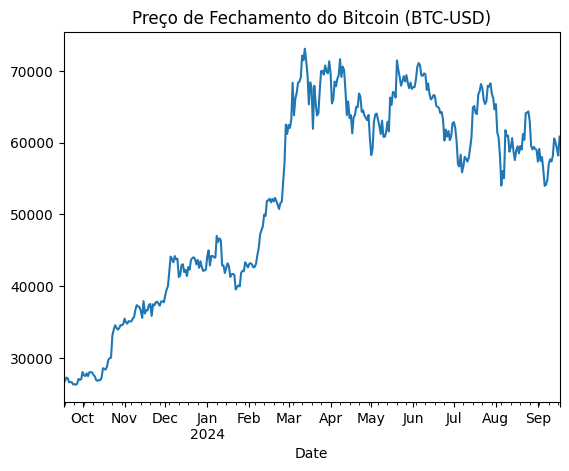

In [9]:
# Plotando o preço de fechamento do Bitcoin
btc_data['Close'].plot(title='Preço de Fechamento do Bitcoin (BTC-USD)')
plt.show()

# Análise de Volatilidade

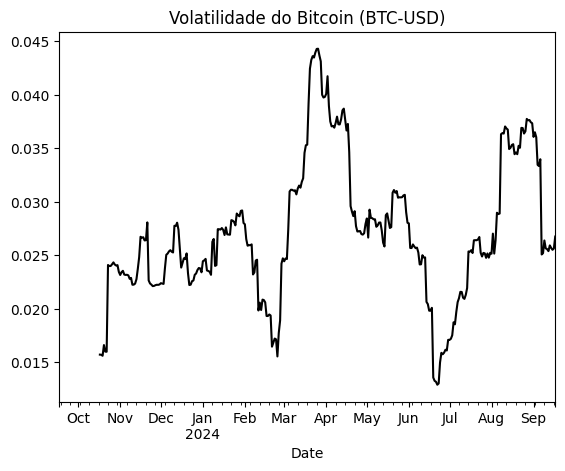

In [20]:
# Calculando a volatilidade (desvio padrão da variação percentual diária)
btc_data['Returns'] = btc_data['Close'].pct_change()
btc_data['Volatility'] = btc_data['Returns'].rolling(window=30).std()

# Plotando a volatilidade
btc_data['Volatility'].plot(title='Volatilidade do Bitcoin (BTC-USD)', color='black')
plt.show()


# Volume de Negociação

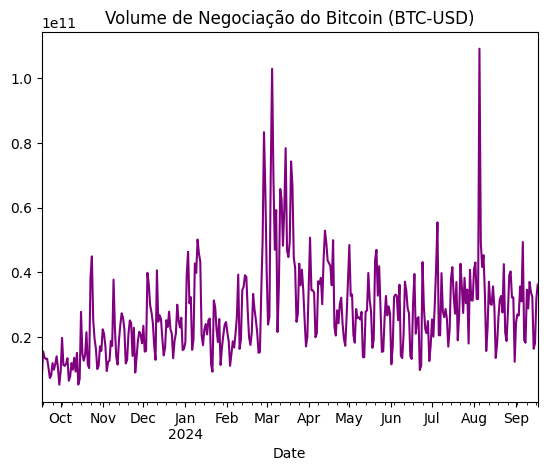

In [21]:
# Plotando o volume de negociação do Bitcoin
btc_data['Volume'].plot(title='Volume de Negociação do Bitcoin (BTC-USD)', color='purple')
plt.show()

# Médias Móveis (SMA)

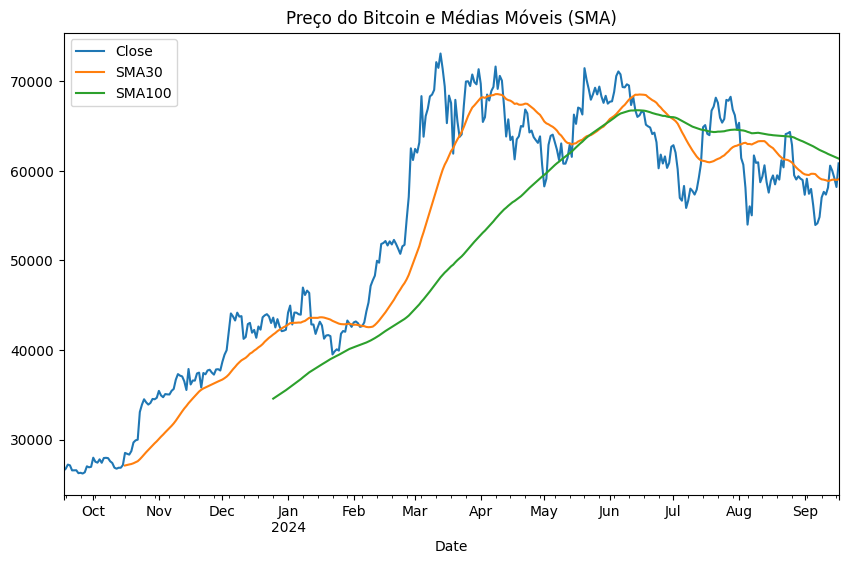

In [22]:
# Calculando as médias móveis simples (SMA) de 30 dias e 100 dias
btc_data['SMA30'] = btc_data['Close'].rolling(window=30).mean()
btc_data['SMA100'] = btc_data['Close'].rolling(window=100).mean()

# Plotando o preço de fechamento e as médias móveis
btc_data[['Close', 'SMA30', 'SMA100']].plot(title='Preço do Bitcoin e Médias Móveis (SMA)', figsize=(10, 6))
plt.show()


# Índice de Força Relativa (RSI)

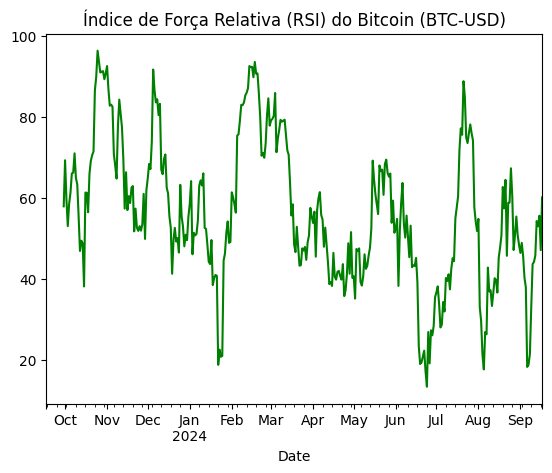

In [23]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calculando o RSI com janela de 14 dias
btc_data['RSI'] = calculate_rsi(btc_data)

# Plotando o RSI
btc_data['RSI'].plot(title='Índice de Força Relativa (RSI) do Bitcoin (BTC-USD)', color='green')
plt.show()


# Decomposição da série temporal

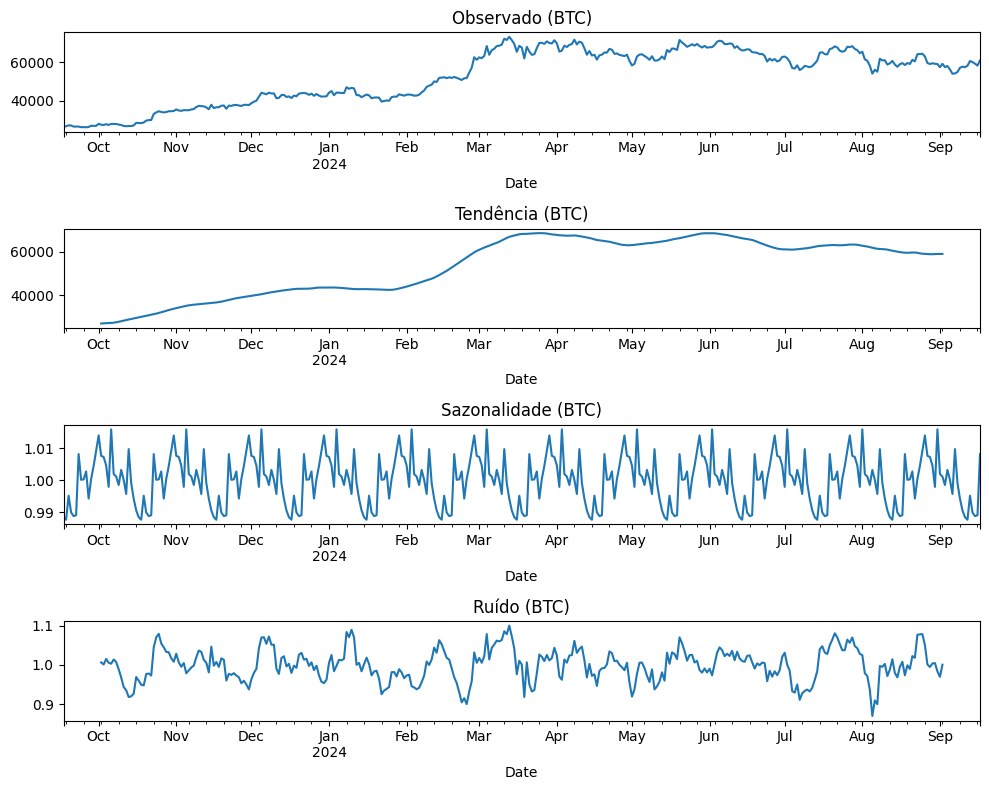

In [12]:
# Decompondo a série temporal para o Bitcoin
decomposition = seasonal_decompose(btc_data['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observado (BTC)')
decomposition.trend.plot(ax=axes[1], title='Tendência (BTC)')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade (BTC)')
decomposition.resid.plot(ax=axes[3], title='Ruído (BTC)')
plt.tight_layout()
plt.show()
